In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
np.set_printoptions(precision=3,suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
url ='https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']
raw_dataset = pd.read_csv(url,names=column_names,na_values='?',comment='\t', sep=' ',skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.head(7)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1


In [6]:
dataset.isna().sum()

MPG 0
Cylinders 0
Displacement 0
Horsepower 6
Weight 0
Acceleration 0
Model Year 0
Origin 0
dtype: int64

In [7]:
dataset = dataset.dropna()

In [8]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [9]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [10]:
train_dataset=dataset.sample(frac=0.8, random_state=0)
test_dataset=dataset.drop(train_dataset.index)

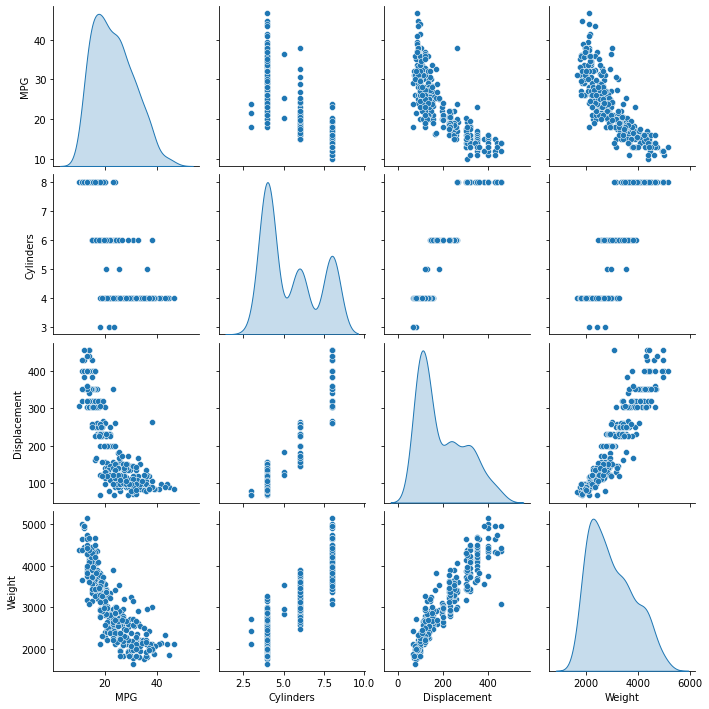

In [11]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [14]:
#Normalizacja

train_dataset.describe().transpose()[['mean','std']]
#

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [27]:
#warstwa normalizacji
normalizer = tf.keras.layers.Normalization(axis=-1)

In [28]:
normalizer.adapt(np.array(train_features))

In [29]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [30]:
first = np.array(train_features[:1])
with np.printoptions(precision=2, suppress=True):
    print(f'pierwszy element: {first}\n')
    print(f'Znormalizowany: {normalizer(first).numpy()}')

pierwszy element: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Znormalizowany: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


In [40]:
#regresja liniowa z jedną zmienną
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [41]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])

horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [42]:
horsepower_model.predict(horsepower[:10])

array([[-0.304],
 [-0.172],
 [ 0.562],
 [-0.426],
 [-0.386],
 [-0.151],
 [-0.457],
 [-0.386],
 [-0.101],
 [-0.172]], dtype=float32)

In [43]:
horsepower_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [45]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 3.74 s, sys: 116 ms, total: 3.86 s
Wall time: 3.62 s


In [46]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804337,4.196363,95
96,3.806300,4.182238,96
97,3.804048,4.198655,97
98,3.806831,4.190541,98
99,3.803076,4.198202,99


In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'],label='loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlim([0,100])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

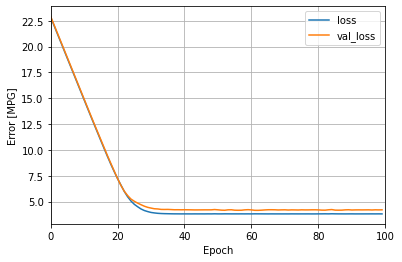

In [50]:
plot_loss(history)

In [51]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels,verbose=0
)

In [52]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

In [53]:
def plot_horsepower(x,y):
    plt.scatter(train_features['Horsepower'],train_labels,label="Data")
    plt.plot(x,y,color='k',label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

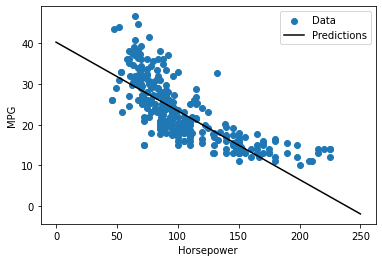

In [54]:
plot_horsepower(x, y)

In [55]:
#regresja z głęboką siecią neuronową

def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))
    return model

In [56]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [57]:
dnn_horsepower_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [58]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split = 0.2,
    verbose = 0,
    epochs=100
)

CPU times: user 3.98 s, sys: 189 ms, total: 4.17 s
Wall time: 3.78 s


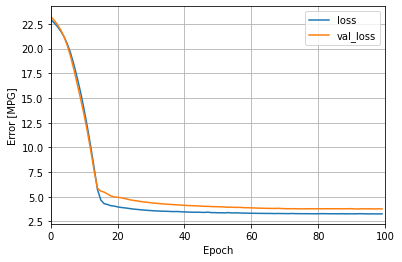

In [59]:
plot_loss(history)

In [60]:
x = tf.linspace(0.0,250,251)
y=dnn_horsepower_model.predict(x)

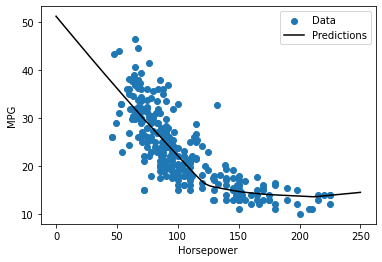

In [61]:
plot_horsepower(x,y)